# Lab 4 : CLUSTERING Part 1

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

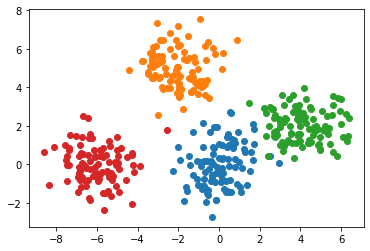

In [9]:
# Means and variances
means = np.array([[0, 0], [-2, 5], [4, 2], [-6,0]])
variance = np.identity(2)


# Sample 100 points from each
samples = np.array([np.random.multivariate_normal(mean, variance, size=100) for mean in means])
for sample in samples:
    plt.scatter(sample[:, 0], sample[:, 1])
plt.show()

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

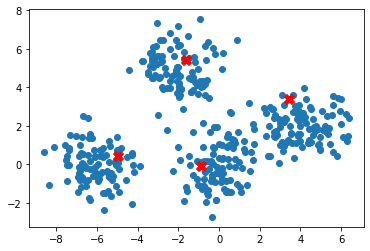

In [10]:
# Combine samples into one array
X = np.concatenate(samples, axis=0)

# Choose k initial cluster centroids
k = 4
centroids = X[np.random.randint(X.shape[0], size=k), :]

# Plot the initial centroids
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=100)
plt.show()

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

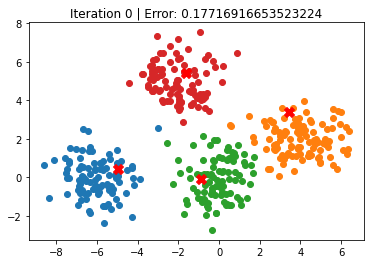

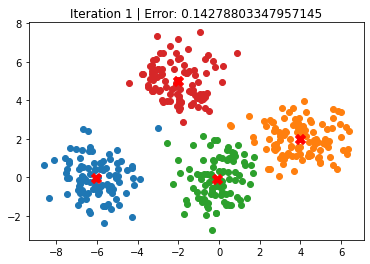

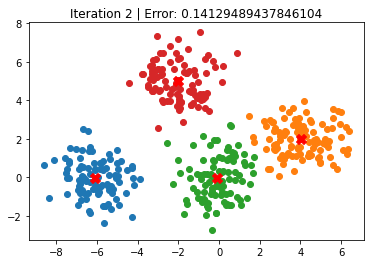

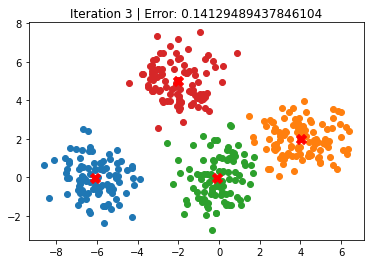

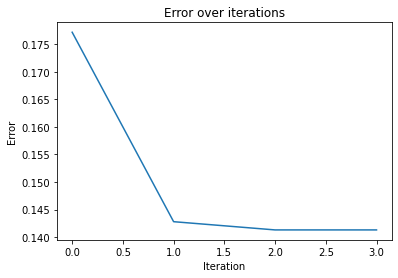

In [11]:
# Assign each sample to the closest centroid
def assign_clusters(X, centroids):
    # Initialize empty list of clusters
    clusters = [[] for i in range(k)]
    # For each sample
    label_pred = []
    for sample in X:
        # Find the centroid closest to the sample
        closest_centroid = np.argmin(np.linalg.norm(sample - centroids, axis=1))
        # Add the sample to the closest centroid
        clusters[closest_centroid].append(sample)
        label_pred.append(closest_centroid)

    return clusters, label_pred

# Recompute centroids based on new assignments
def recompute_centroids(clusters):
    # Initialize empty list of new centroids
    new_centroids = []
    # For each cluster
    for cluster in clusters:
        # Compute the mean of the cluster
        mean = np.mean(cluster, axis=0)
        # Add the new centroid to the list of new centroids
        new_centroids.append(mean)
    return new_centroids

# Error function
def compute_error(clusters, centroids):
    # Initialize error as 0
    error = 0
    # For each cluster
    for idx, cluster in enumerate(clusters):
        error += np.sum(np.linalg.norm(cluster - centroids[idx]))
    error /= 400
    return error

def plot_clusters(clusters, centroids, iteration, error):
    # Plot the clusters
    for cluster in clusters:
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1])
    # Plot the centroids
    centroids = np.array(centroids)
    plt.title(f"Iteration {iteration} | Error: {error}")
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=100)
    plt.show()

# K-means algorithm
error = []
for i in range(1000):
    # Assign each sample to the closest centroid
    clusters, label_pred = assign_clusters(X, centroids)
    # Recompute centroids based on new assignments
    if not i == 0:      
        centroids = recompute_centroids(clusters)
    # Compute error
    error.append(compute_error(clusters, centroids))
    # Plot the clusters
    plot_clusters(clusters, centroids, i, error[-1])
    # If error is low break
    if i > 1:
        if error[-2] - error[-1] < 1e-10:
            break

plt.plot(error)
plt.title("Error over iterations")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [12]:
from sklearn.metrics import homogeneity_score, silhouette_score

# Calculate Homogeinity Score
label_true = np.array([0]*100 + [1]*100 + [2]*100 + [3]*100)
print(f"Homogeneity Score: {homogeneity_score(label_true, label_pred)}")

# Calculate Silhouette Score
print(f"Silhouette Score: {silhouette_score(X, label_pred)}")

Homogeneity Score: 0.9593809283348477
Silhouette Score: 0.6356119652070429


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

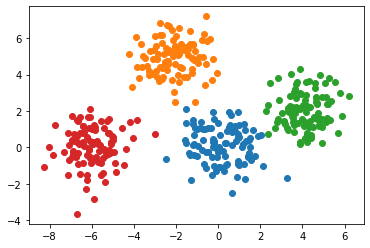

In [6]:
# Means and variances
means = np.array([[0, 0], [-2, 5], [4, 2], [-6,0]])
variance = np.identity(2)


# Sample 100 points from each
samples = np.array([np.random.multivariate_normal(mean, variance, size=100) for mean in means])
for sample in samples:
    plt.scatter(sample[:, 0], sample[:, 1])
plt.show()

data = np.concatenate(samples, axis=0)

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [7]:
def initialization(data,K):

    # Initialize mean vector
    mean_vector = X[np.random.randint(X.shape[0], size=K), :].T

    # Initialize covariance matrix
    covariance_matrix = [np.identity(X.shape[1])*np.max(data)]*K

    # Initialize weights
    weights = [1/K]*K

    theta = [mean_vector, covariance_matrix, weights]
    
    return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [8]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):
    mean_vector = theta[0]
    covariance_matrix = theta[1]
    weights = theta[2]

    responsibility = np.zeros((data.shape[0], K))
    
    for i, x in enumerate(data):
        for k in range(K):
            responsibility[i, k] = weights[k] * multivariate_normal.pdf(x, mean_vector[:, k], covariance_matrix[k])
        responsibility[i, :] /= max(np.sum(responsibility[i, :]), 1e-10)

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [9]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    mean_vector = np.zeros((2, K))
    covariance_matrix = np.zeros((K, 2, 2))
    weights = np.zeros(K)
    
    for k in range(K):
        # Update weight
        N_k = np.sum(responsibility[:, k])
        weights[k] = N_k / data.shape[0]

        # Update mean vector
        mean_vector[:, k] = np.dot(responsibility[:, k], data) / N_k

        # Update covariance matrix
        for i in range(data.shape[0]):
            covariance_matrix[k] += responsibility[i, k] * np.outer(data[i] - mean_vector[:, k], data[i] - mean_vector[:, k])
        covariance_matrix[k] /= N_k

    theta = [mean_vector, covariance_matrix, weights]

    log_likelihood = np.sum(np.log(np.sum([weights[k] * multivariate_normal.pdf(data, mean_vector[:, k], covariance_matrix[k]) for k in range(K)], axis=0)))
           
    return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

/tmp/ipykernel_120680/3869795240.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_120680/3869795240.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


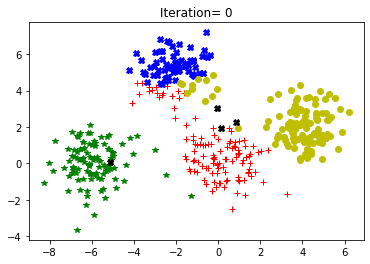

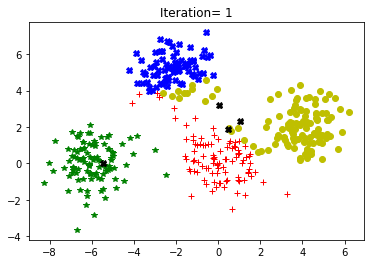

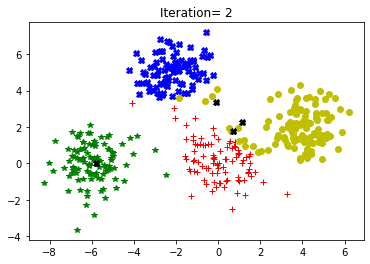

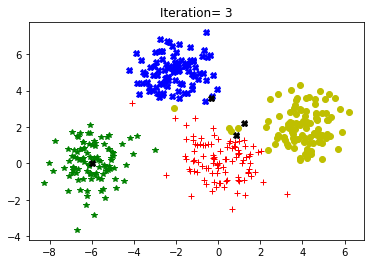

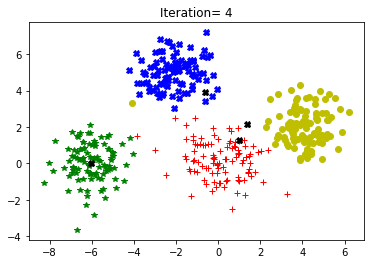

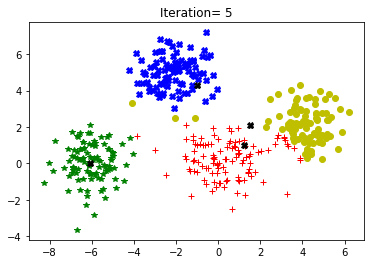

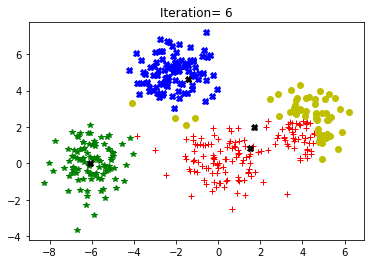

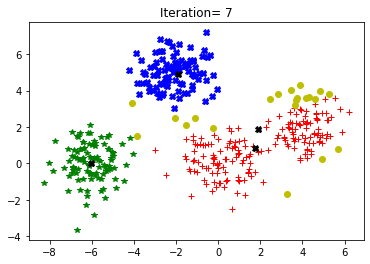

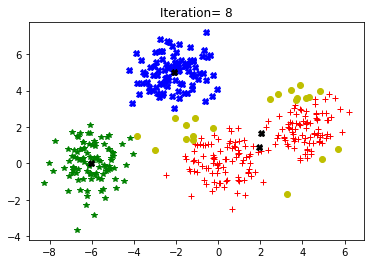

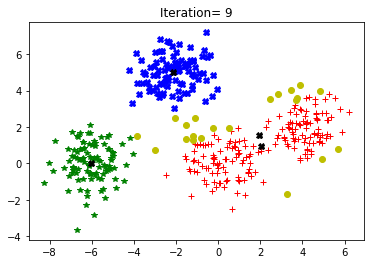

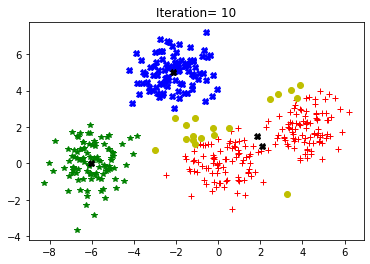

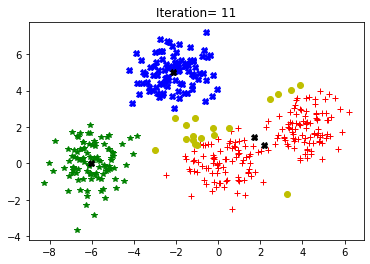

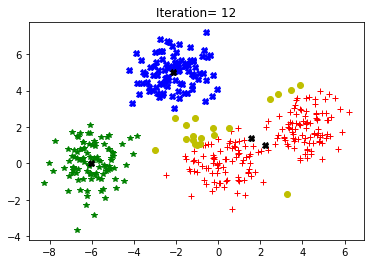

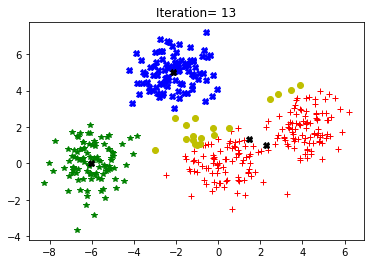

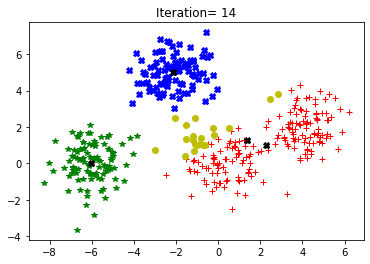

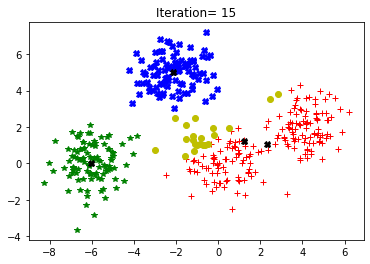

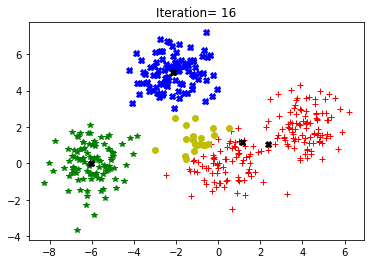

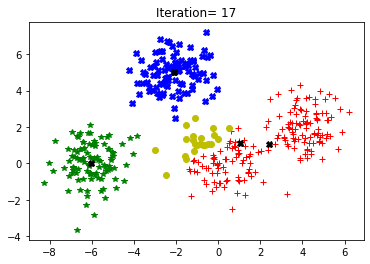

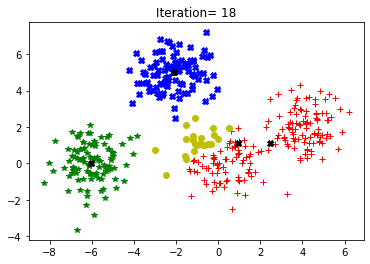

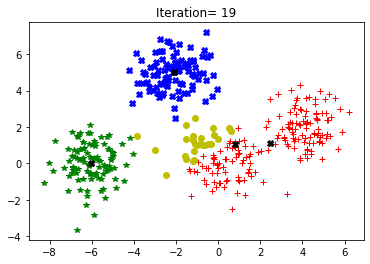

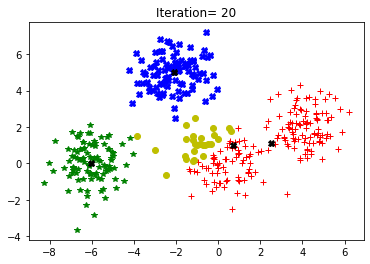

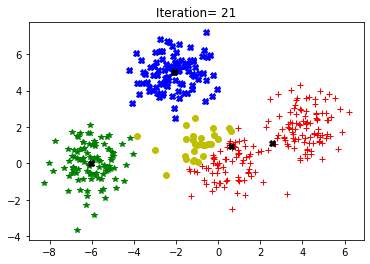

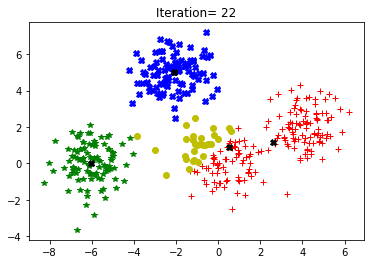

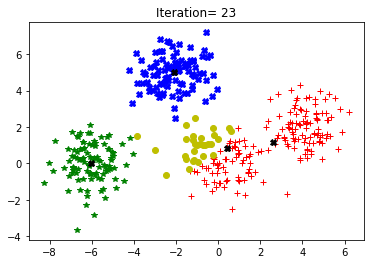

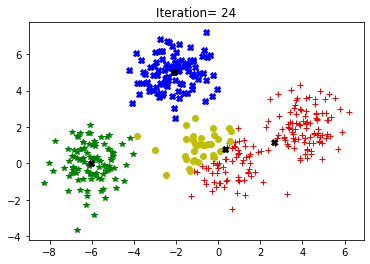

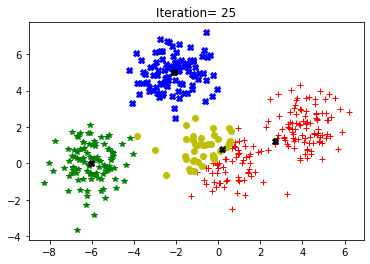

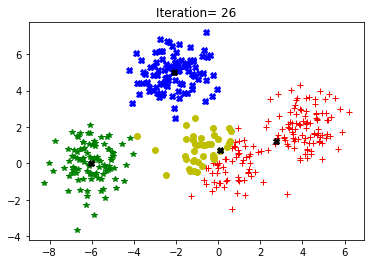

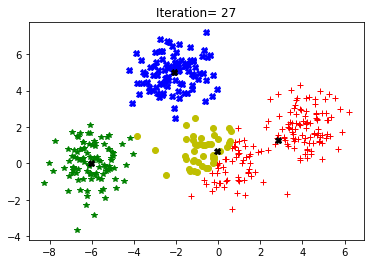

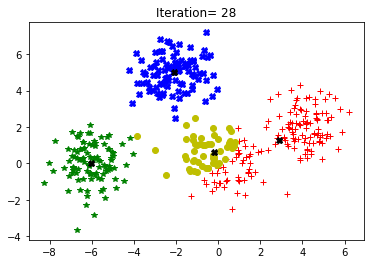

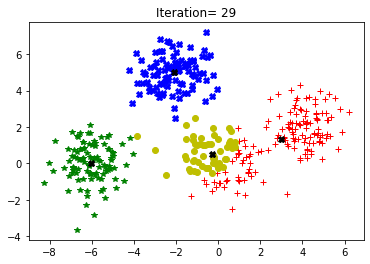

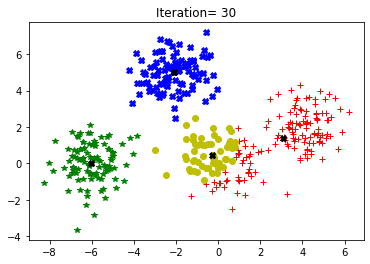

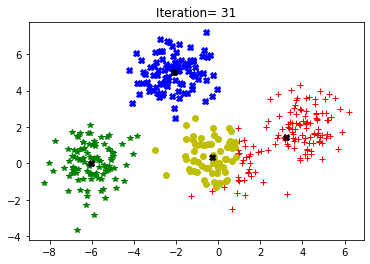

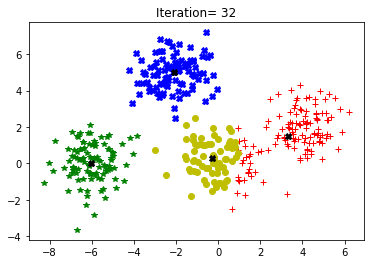

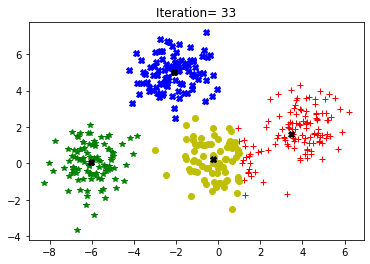

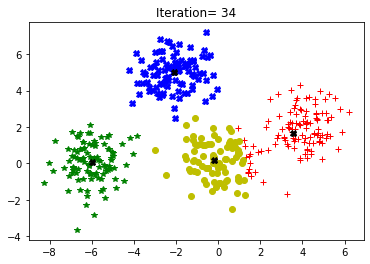

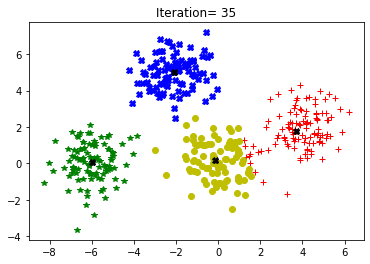

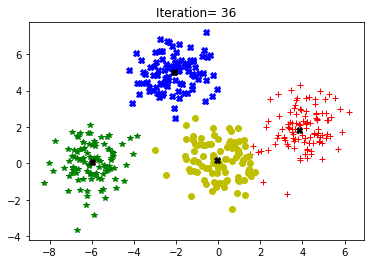

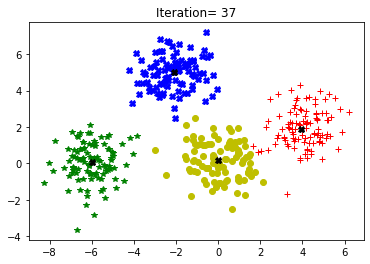

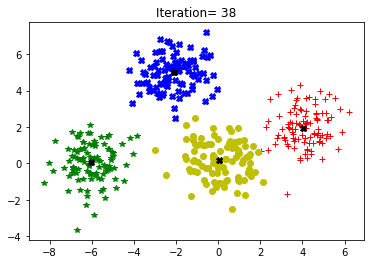

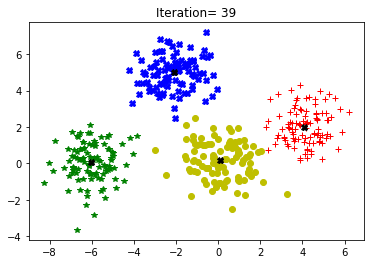

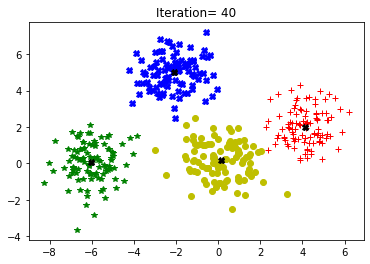

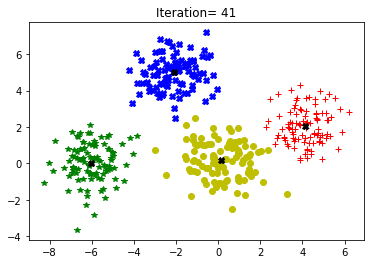

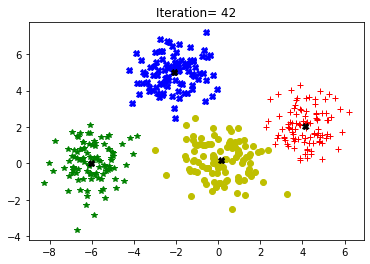

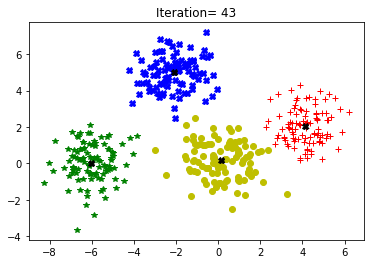

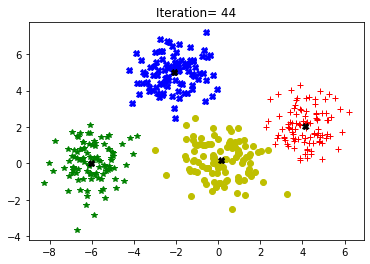

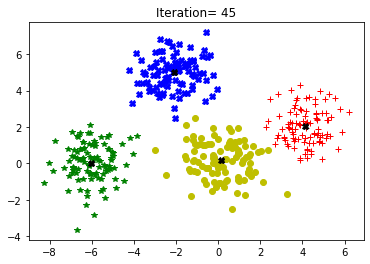

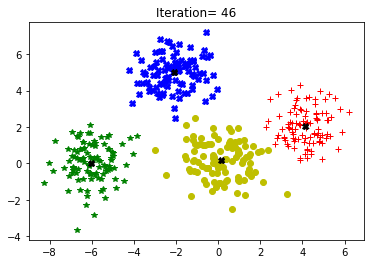

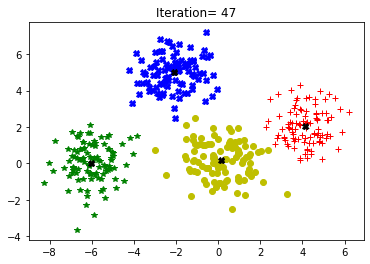

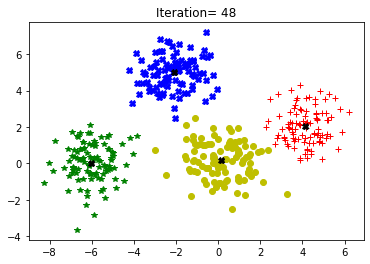

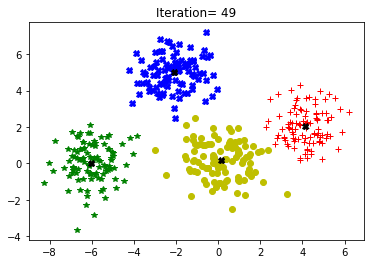

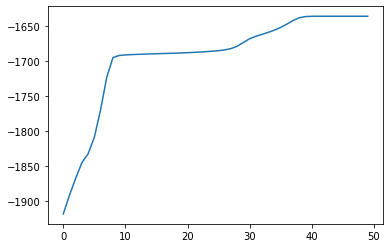

In [10]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters

theta=initialization(data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0].T
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [11]:
# Calculate Homogeinity Score
label_true = np.array([0]*100 + [1]*100 + [2]*100 + [3]*100)
print(f"Homogeneity Score: {homogeneity_score(label_true, cluster_label)}")

# Calculate Silhouette Score
print(f"Silhouette Score: {silhouette_score(data, cluster_label)}")

Homogeneity Score: 0.969595080847001
Silhouette Score: 0.6469351622789311


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

/tmp/ipykernel_443391/3332099833.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.array(np.random.multivariate_normal(means[0], variance[0], size=100))


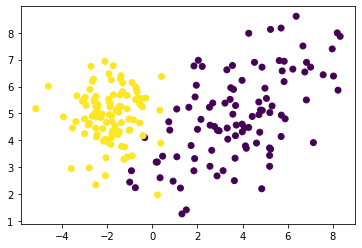

In [51]:
# Means and variances
means = np.array([[4, 5], [-2, 5]])
variance = np.array([[[2, 3], [5, 3]], [[1, 0], [0, 1]]])

# Sample 100 points from each
s1 = np.array(np.random.multivariate_normal(means[0], variance[0], size=100))
s2 = np.array(np.random.multivariate_normal(means[1], variance[1], size=100))
samples = np.concatenate((s1, s2), axis=0)
labels = np.array([0]*100 + [1]*100)

plt.scatter(samples[:, 0], samples[:, 1], c=labels)
plt.show()

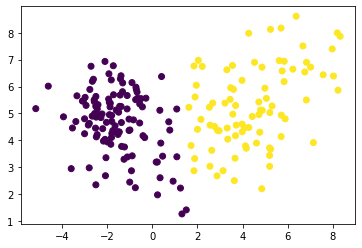

Homogeneity Score: 0.6642991177133697


In [52]:
# Cluster using k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(samples)
labels_pred = kmeans.labels_

plt.scatter(samples[:, 0], samples[:, 1], c=labels_pred)
plt.show()

# Calculate Homogeinity Score
print(f"Homogeneity Score: {homogeneity_score(labels, labels_pred)}")

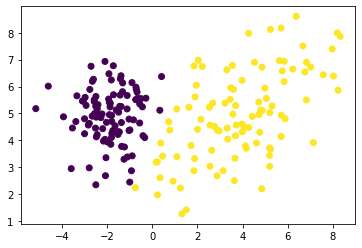

Homogeneity Score: 0.832011663858963


In [53]:
# Cluster using GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2).fit(samples)
labels_pred = gmm.predict(samples)

plt.scatter(samples[:, 0], samples[:, 1], c=labels_pred)
plt.show()

# Calculate Homogeinity Score
print(f"Homogeneity Score: {homogeneity_score(labels, labels_pred)}")

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

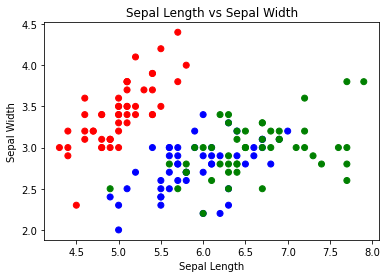

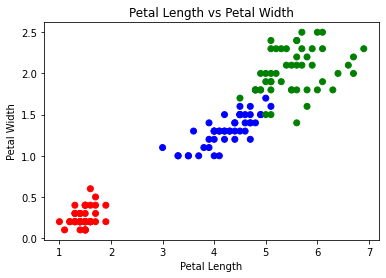

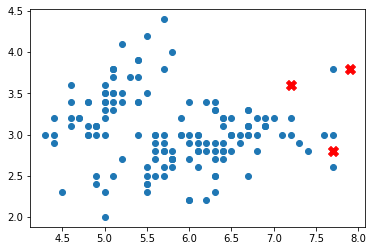

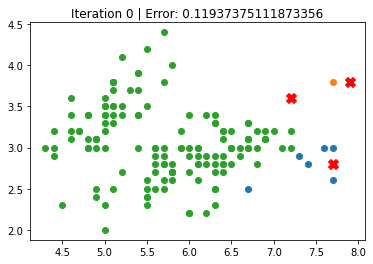

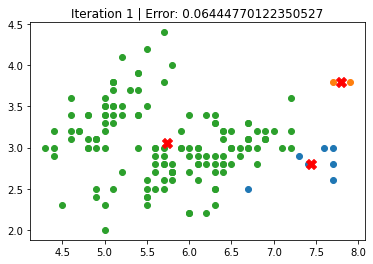

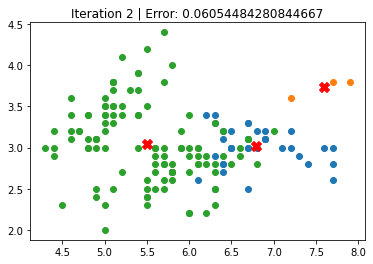

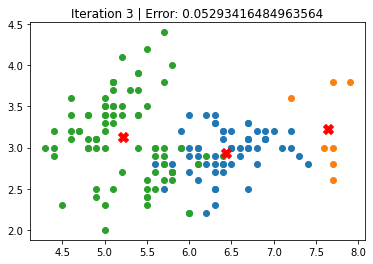

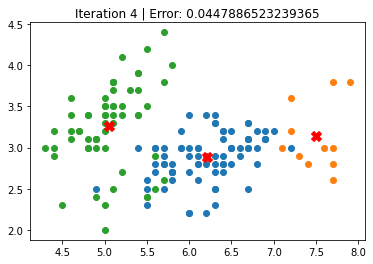

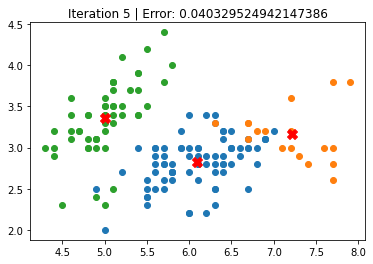

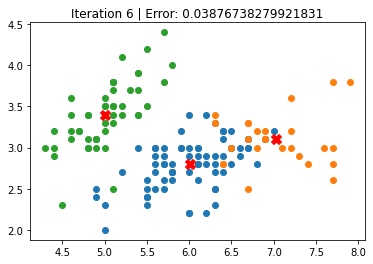

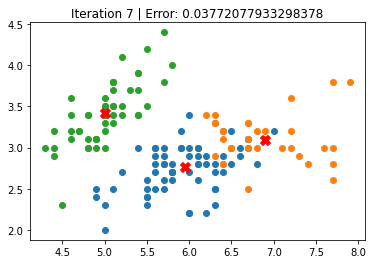

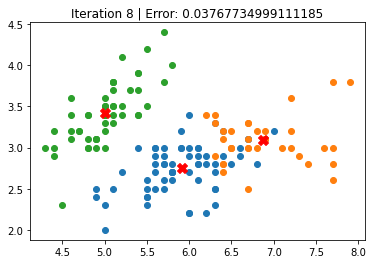

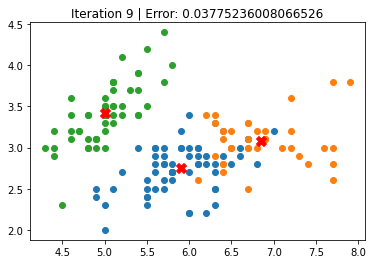

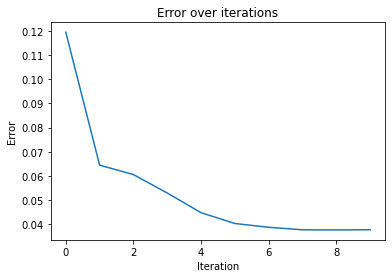

Homogeneity Score: 0.7514854021988338
Confusion Matrix:
[[ 0.  0. 50.]
 [48.  2.  0.]
 [14. 36.  0.]]


In [12]:
import pandas as pd

df = pd.read_csv('IRIS.csv')

x = df.iloc[:, [0, 1, 2, 3]].values
y = df.iloc[:, 4].values

# Plot Sepal Length vs Sepal Width
colors = {'Iris-setosa': 'red', 'Iris-virginica': 'green', 'Iris-versicolor': 'blue'}
labels = {'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2}
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species'].apply(lambda x: colors[x]))
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Plot Petal Length vs Petal Width
plt.scatter(df['petal_length'], df['petal_width'], c=df['species'].apply(lambda x: colors[x]))
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

def k_means(X, k):
    # Assign each sample to the closest centroid
    def assign_clusters(X, centroids):
        # Initialize empty list of clusters
        clusters = [[] for i in range(k)]
        # For each sample
        label_pred = []
        for sample in X:
            # Find the centroid closest to the sample
            closest_centroid = np.argmin(np.linalg.norm(sample - centroids, axis=1))
            # Add the sample to the closest centroid
            clusters[closest_centroid].append(sample)
            label_pred.append(closest_centroid)

        return clusters, label_pred

    # Recompute centroids based on new assignments
    def recompute_centroids(clusters):
        # Initialize empty list of new centroids
        new_centroids = []
        # For each cluster
        for cluster in clusters:
            # Compute the mean of the cluster
            mean = np.mean(cluster, axis=0)
            # Add the new centroid to the list of new centroids
            new_centroids.append(mean)
        return new_centroids

    # Error function
    def compute_error(clusters, centroids):
        # Initialize error as 0
        error = 0
        # For each cluster
        for idx, cluster in enumerate(clusters):
            error += np.sum(np.linalg.norm(cluster - centroids[idx]))
        error /= 400
        return error

    def plot_clusters(clusters, centroids, iteration, error):
        # Plot the clusters
        for cluster in clusters:
            cluster = np.array(cluster)
            plt.scatter(cluster[:, 0], cluster[:, 1])
        # Plot the centroids
        centroids = np.array(centroids)
        plt.title(f"Iteration {iteration} | Error: {error}")
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=100)
        plt.show()

    # Choose k initial cluster centroids
    centroids = X[np.random.randint(X.shape[0], size=k), :]

    # Plot the initial centroids
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=100)
    plt.show()

    # K-means algorithm
    error = []
    for i in range(1000):
        # Assign each sample to the closest centroid
        clusters, label_pred = assign_clusters(X, centroids)
        # Recompute centroids based on new assignments
        if not i == 0:      
            centroids = recompute_centroids(clusters)
        # Compute error
        error.append(compute_error(clusters, centroids))
        # Plot the clusters
        plot_clusters(clusters, centroids, i, error[-1])
        # If error is low break
        if i > 1:
            if error[-2] - error[-1] < 1e-10:
                break

    plt.plot(error)
    plt.title("Error over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()

    return label_pred

label_pred = k_means(x, 3)
label_true = np.array([0 if i == 'Iris-setosa' else 1 if i == 'Iris-versicolor' else 2 for i in y])

print(f"Homogeneity Score: {homogeneity_score(label_true, label_pred)}")

confusion_matrix = np.zeros((3, 3))
for i in range(len(x)):
    confusion_matrix[label_true[i]][label_pred[i]] += 1

print("Confusion Matrix:")
print(confusion_matrix)


In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x)

# Performance Metrics
print(f"Homogeneity Score: {homogeneity_score(label_true, y_pred)}")
print(f"Silhouette Score: {silhouette_score(x, y_pred)}")

# Confusion Matrix
confusion_matrix = np.zeros((3, 3))
for i in range(len(x)):
    confusion_matrix[label_true[i]][y_pred[i]] += 1

print("Confusion Matrix:")
print(confusion_matrix)

Homogeneity Score: 0.7514854021988339
Silhouette Score: 0.5525919445499755
Confusion Matrix:
[[ 0. 50.  0.]
 [48.  0.  2.]
 [14.  0. 36.]]


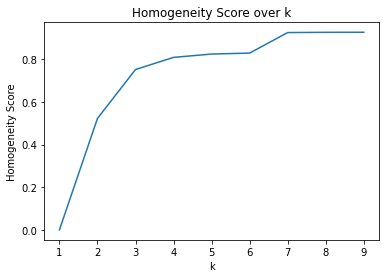

In [14]:
# Find best k value from 1 to 10
scores = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(x)
    scores.append(homogeneity_score(label_true, y_pred))

plt.plot(range(1, 10), scores)
plt.title("Homogeneity Score over k")
plt.xlabel("k")
plt.ylabel("Homogeneity Score")
plt.show()

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [16]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3)
y_pred = gm.fit_predict(x)

# Performance Metrics
print(f"Homogeneity Score: {homogeneity_score(label_true, y_pred)}")
print(f"Silhouette Score: {silhouette_score(x, y_pred)}")

# Confusion Matrix
confusion_matrix = np.zeros((3, 3))
for i in range(len(x)):
    confusion_matrix[label_true[i]][y_pred[i]] += 1

print("Confusion Matrix:")
print(confusion_matrix)

Homogeneity Score: 0.8983263672602777
Silhouette Score: 0.5009470350205055
Confusion Matrix:
[[50.  0.  0.]
 [ 0. 45.  5.]
 [ 0.  0. 50.]]
